In [1]:
from MyCam import MyCam2,MyCam
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, XGradCAM, EigenCAM, LayerCAM, HiResCAM, FullGrad, RandomCAM
# , AblationCAM
from methods.ablation_cam import AblationCAM
from methods.score_cam import ScoreCAM
from BaseGradient import *
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import copy

In [2]:
model = models.vgg16(pretrained=True)
model.eval()
model = model.to('mps')

/Users/trungmai-eh/.pyenv/versions/3.10.14/envs/thesis/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/trungmai-eh/.pyenv/versions/3.10.14/envs/thesis/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        # x = torch.relu(x)  # Applying ReLU activation function
        return x

def generate_model(model):
    new_model = torch.nn.Sequential(*(list(model.children())[0] + torch.nn.Sequential(model.avgpool) + torch.nn.Sequential(Flatten()) + list(model.children())[2]))
    layers = torch.nn.Sequential(*(list(new_model.children())))
    return copy.deepcopy(layers)

In [4]:
m = generate_model(model)
saliency1 = MyCam2(m)

In [5]:
from benchmarks.imagesDataset import ImagesDataset

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Resize((224, 224)),
                                    transforms.Normalize( (0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                                    ])

dataset = ImagesDataset(
    '/Users/trungmai-eh/Developer/CAMProjectXAI/datasets/ILSVRC2012_val_folders/image_list.txt',
    '/Users/trungmai-eh/Developer/CAMProjectXAI/datasets/ILSVRC2012_val_folders/labels.txt',
    '/Users/trungmai-eh/Developer/CAMProjectXAI/ILSVRC2012_val_folders',
    transform=transform,
)

In [7]:
sample, labels, sample_name = dataset[0]
sample = sample.unsqueeze(0)

/Users/trungmai-eh/.pyenv/versions/3.10.14/envs/thesis/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [8]:
saliency1(sample, None)

array([[4.6240450e-05, 4.5706882e-05, 4.3810018e-05, ..., 4.0457300e-05,
        4.0140007e-05, 3.9104678e-05],
       [4.7315069e-05, 5.1600651e-05, 4.7655976e-05, ..., 4.6265224e-05,
        4.3468248e-05, 4.4292072e-05],
       [4.7695543e-05, 5.2115152e-05, 5.0829345e-05, ..., 4.5524866e-05,
        4.4102140e-05, 4.7136175e-05],
       ...,
       [3.4995228e-05, 3.6687077e-05, 4.2608714e-05, ..., 3.9814207e-05,
        3.7929414e-05, 3.7816179e-05],
       [3.5579982e-05, 3.4066958e-05, 3.7082700e-05, ..., 4.2980275e-05,
        3.8373546e-05, 3.6054105e-05],
       [3.6849866e-05, 3.7717662e-05, 3.3720335e-05, ..., 3.5805278e-05,
        3.5402467e-05, 3.6488193e-05]], dtype=float32)

In [9]:
m = generate_model(model)
saliency2 = MyCam(m)

In [10]:
saliency2(sample,None)

/Users/trungmai-eh/.pyenv/versions/3.10.14/envs/thesis/lib/python3.10/site-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


array([[4.6240450e-05, 4.5706882e-05, 4.3810018e-05, ..., 4.0457300e-05,
        4.0140007e-05, 3.9104678e-05],
       [4.7315069e-05, 5.1600651e-05, 4.7655976e-05, ..., 4.6265224e-05,
        4.3468248e-05, 4.4292072e-05],
       [4.7695543e-05, 5.2115152e-05, 5.0829345e-05, ..., 4.5524866e-05,
        4.4102140e-05, 4.7136175e-05],
       ...,
       [3.4995228e-05, 3.6687077e-05, 4.2608714e-05, ..., 3.9814207e-05,
        3.7929414e-05, 3.7816179e-05],
       [3.5579982e-05, 3.4066958e-05, 3.7082700e-05, ..., 4.2980275e-05,
        3.8373546e-05, 3.6054105e-05],
       [3.6849866e-05, 3.7717662e-05, 3.3720335e-05, ..., 3.5805278e-05,
        3.5402467e-05, 3.6488193e-05]], dtype=float32)

In [11]:
for i in saliency1.gradients:
    print(i.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])


In [12]:
saliency1.gradients[0][3].shape

IndexError: index 3 is out of bounds for dimension 0 with size 1

In [13]:
for i in saliency2.gradients:
    print(i.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])


In [14]:
(saliency1.gradients[-1] - saliency2.gradients[-1]).sum()

tensor(-19.5715, device='mps:0')

In [15]:
for i,j in zip(saliency1.activations_bias,saliency2.activations_bias):
    print((i-j).sum())

tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)
tensor(0., device='mps:0', grad_fn=<SumBackward0>)


In [16]:
m

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [17]:
import torch
from utils import *
from BaseGradient import VallinaGradient,InputGradient,IntegratedGradient
from methods.grad_cam import GradCAM
from methods.score_cam import ScoreCAM
from MyCam import MyCam
model = models.vgg16(pretrained=True)
model.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
class SanityCheck:
    def __init__(self,
                 model : torch.nn.Module,
                 device = "mps") -> None:
        self.device = device
        self.model = model.eval().to(self.device)
        self._preprocess()

    def _preprocess(self):
        self.model_weights = []
        self.model_bias = []
        self.rand_weights = []
        self.rand_bias = []
        self.modules = []


        for i in self.model.modules():
            if hasattr(i,'weight'):
                self.modules.insert(0,i)
                self.model_weights.insert(0,i.weight)
                self.model_bias.insert(0,i.bias)
                self.rand_weights.insert(0, torch.nn.Parameter(torch.normal(i.weight.mean().item(),i.weight.std().item(),i.weight.shape)))
                self.rand_bias.insert(0, torch.nn.Parameter(torch.normal(i.bias.mean().item(),i.bias.std().item(),i.bias.shape)))

    def check(self,image,method,class_idx):
        sals = []
        for module,rand_w,rand_b in zip(self.modules,self.rand_weights,self.rand_bias):
            module.weight = rand_w
            module.bias = rand_b

            salency = method(model,device = self.device)
            sals.append(salency(image, class_idx = class_idx))

        for module,w,b in zip(self.modules,self.model_weights,self.model_bias):
            module.weight = w
            module.bias = b
        return sals

In [19]:
sal = MyCam(model,'cpu')
f_map = sal(ins)

NameError: name 'ins' is not defined

In [20]:
def make_map(image_dir,class_idx = None):
    ins = input_link(image_dir)
    img2 = Image.open(image_dir).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
    ])
    img2 = preprocess(img2)

    f_map2 = sal(ins,class_idx)

    sal_map2 = [sal.input*sal.gradients[0]]
    for i in zip(sal.activations_bias,sal.gradients[1:]):
        sal_map2.append(i[0]*i[1])
    sal_map2 = [i.clamp(min=0).sum((0,1)).detach().numpy() for i in sal_map2]
    return img2,f_map2,sal_map2

In [21]:
f_map

NameError: name 'f_map' is not defined

In [22]:
img,f_map,sal_map = [],[],[]
# list_image = ['./images/test.jpeg','./images/test2.jpeg','./images/test3.jpeg','./images/test4.jpeg','/Users/trungmai-eh/Developer/CAMProjectXAI/ILSVRC2012_val_folders/ILSVRC2012_val_00017104.JPEG']
list_image = ['/Users/trungmai-eh/Developer/CAMProjectXAI/ILSVRC2012_val_folders/ILSVRC2012_val_00017104.JPEG']
for i in list_image:
    temp = make_map(i)
    img.append(temp[0])
    f_map.append(temp[1])
    sal_map.append(temp[2])

#temp = make_map('./images/test4.jpeg',785)
#img.append(temp[0])
#f_map.append(temp[1])
#sal_map.append(temp[2])

In [23]:
class_predict = [ predict_decode(model(input_link(list_image[i])))[0][0] for i in range(len(list_image)) ]

('cocker spaniel', 0.9681156873703003, 219)
('clumber', 0.020629942417144775, 216)
('English setter', 0.004591968841850758, 212)
('Sussex spaniel', 0.004192218650132418, 220)
('Welsh springer spaniel', 0.001031003426760435, 218)


In [24]:
class_predict

['cocker spaniel']

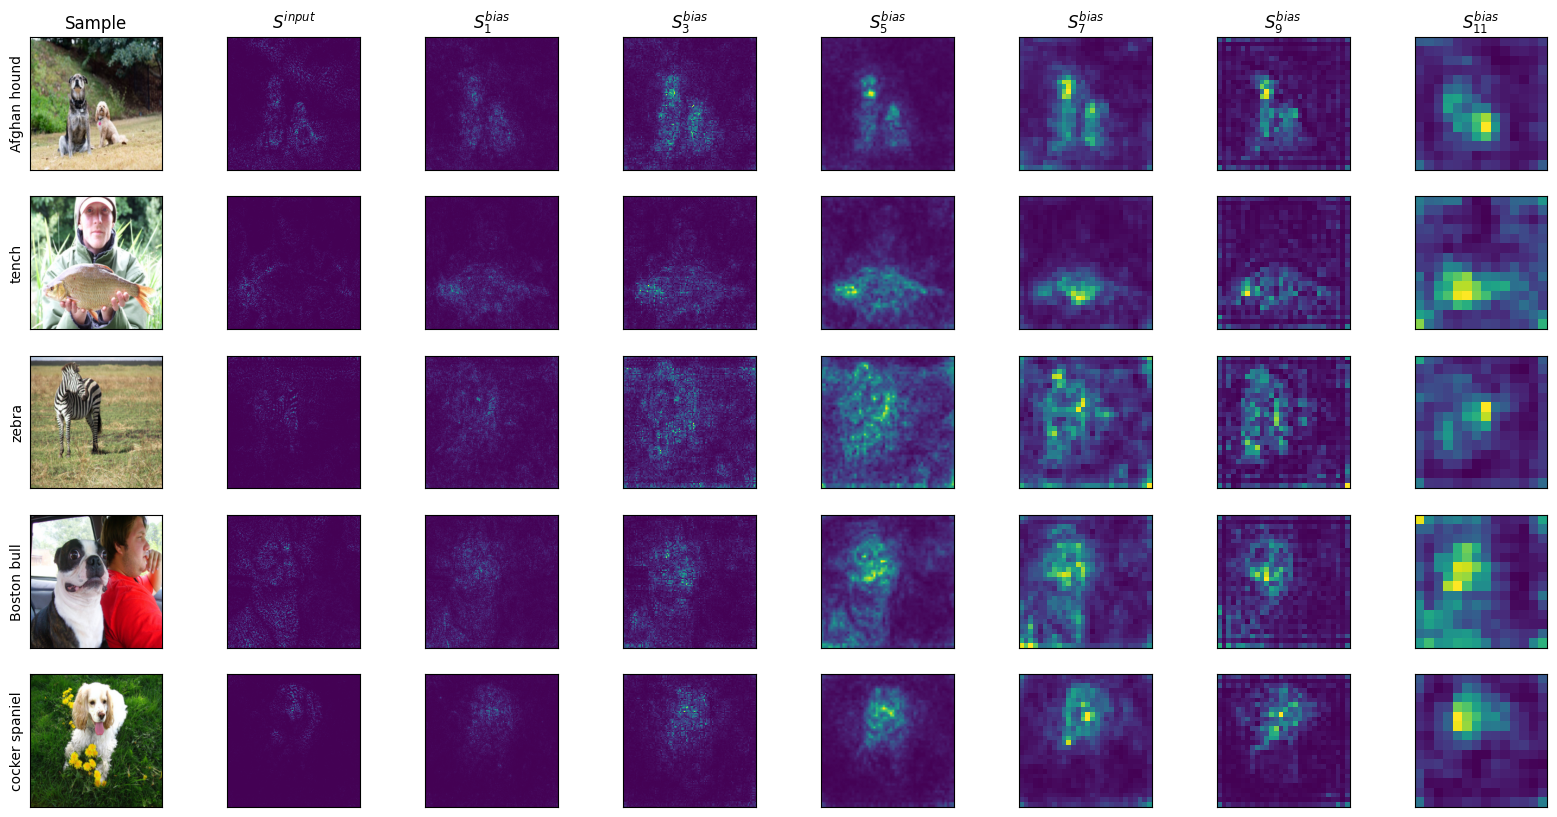

In [25]:
sample = 5
fig,ax = plt.subplots(sample,8, figsize=(20, 10))
ax[0,0].set_title("Sample")
ax[0,1].set_title(r"$S^{input}$")
ax[0,2].set_title(r"$S^{bias}_1$")
ax[0,3].set_title(r"$S^{bias}_3$")
ax[0,4].set_title(r"$S^{bias}_5$")
ax[0,5].set_title(r"$S^{bias}_{7}$")
ax[0,6].set_title(r"$S^{bias}_{9}$")
ax[0,7].set_title(r"$S^{bias}_{11}$")

for k in range(sample):
    for i in range(7):
        ax[k,i+1].imshow(sal_map[k][2*i])
        ax[k,i+1].set_xticks([])
        ax[k,i+1].set_yticks([])

for k in range(sample):
    ax[k,0].imshow(img[k])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
    ax[k,0].set_ylabel(class_predict[k])
    

fig.savefig("sal_plot.png")

In [25]:
def make_maps(image_dir,method,class_idx = None):
    f_map = []
    for i in image_dir:
        ins = input_link(i)
        ins = ins.to("mps")
        print(method, class_idx)
        if isinstance(method, SmoothGradient):
            f_map.append(method(ins, class_idx=219))
            continue
        f_map.append(method(ins,class_idx))
    return f_map

In [26]:
target_layer = [model.features[-1]]
ig = IntegratedGradient(model)
vanilla = VallinaGradient(model)
gradcam = GradCAM(model, target_layers=target_layer)
scorecam = ScoreCAM(model, target_layers=target_layer)
gradcampp = GradCAMPlusPlus(model, target_layers=target_layer)
xgrad = XGradCAM(model, target_layers=target_layer)
eigen = EigenCAM(model, target_layers=target_layer)
inputgrad = InputGradient(model)
smooth = SmoothGradient(model)
methods = [
    ig,
    vanilla,
    gradcam,
    scorecam,
    gradcampp,
    xgrad,
    eigen,
    inputgrad,
    smooth,
    # FullGrad(model, target_layers=target_layer),
]

In [27]:
methods_name = ["IG", "Vallina Gradient", "GradCAM", "ScoreCAM", "GradCam++", "XGradCAM", 'EigenCAM', "Input Gradient", "Smooth Gradient", "FullGrad"]
# methods_name = ["Integrated Gradient", "Vallina Gradient", "GradCAM", "ScoreCAM"]
# methods_name = ["FullGrad"]

In [28]:
temp = FullGrad(model, target_layers=target_layer)
full_grad = make_maps(list_image, temp)

<pytorch_grad_cam.fullgrad_cam.FullGrad object at 0x4611cf8b0> None


In [29]:
kq = [ make_maps(list_image,i) for i in methods ]

<BaseGradient.IntegratedGradient object at 0x3ce39cc10> None
<BaseGradient.VallinaGradient object at 0x3ce39cca0> None
<methods.grad_cam.GradCAM object at 0x4611ce980> None
<methods.score_cam.ScoreCAM object at 0x46103aa10> None
upsampled: torch.Size([1, 512, 224, 224])
<pytorch_grad_cam.grad_cam_plusplus.GradCAMPlusPlus object at 0x461212110> None
<pytorch_grad_cam.xgrad_cam.XGradCAM object at 0x461268400> None
<pytorch_grad_cam.eigen_cam.EigenCAM object at 0x4610474f0> None
<BaseGradient.InputGradient object at 0x461046860> None
<BaseGradient.SmoothGradient object at 0x461046b00> None


In [30]:
kq.append(full_grad)

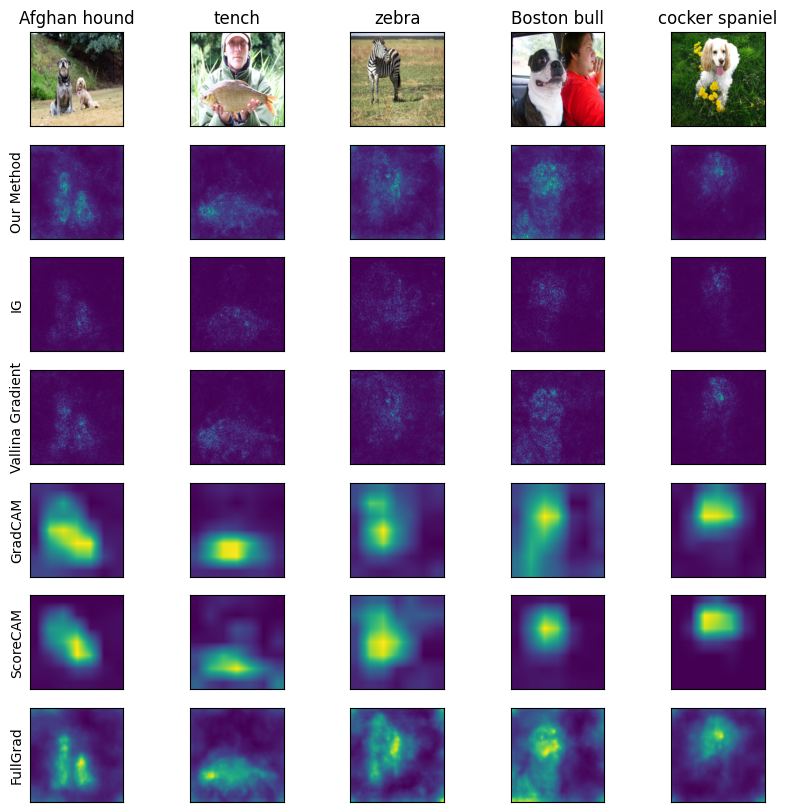

In [32]:
fig,ax = plt.subplots(7,5, figsize=(10, 10))
for i in range(5):
    ax[0,i].set_title(class_predict[i])
    ax[1,i].imshow(f_map[i])
    ax[0,i].imshow(img[i])
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    ax[1,0].set_ylabel("Our Method")
for i in range(5):
    for j in range(5):
        if len(kq[i][j].shape) > 2:
            ax[i+2,j].imshow(kq[i][j][0, :])
        else:
            ax[i+2,j].imshow(kq[i][j])
        ax[i+2,j].set_xticks([])
        ax[i+2,j].set_yticks([])
    ax[i+2,0].set_ylabel(methods_name[i])
    
fig.savefig('kq.png')

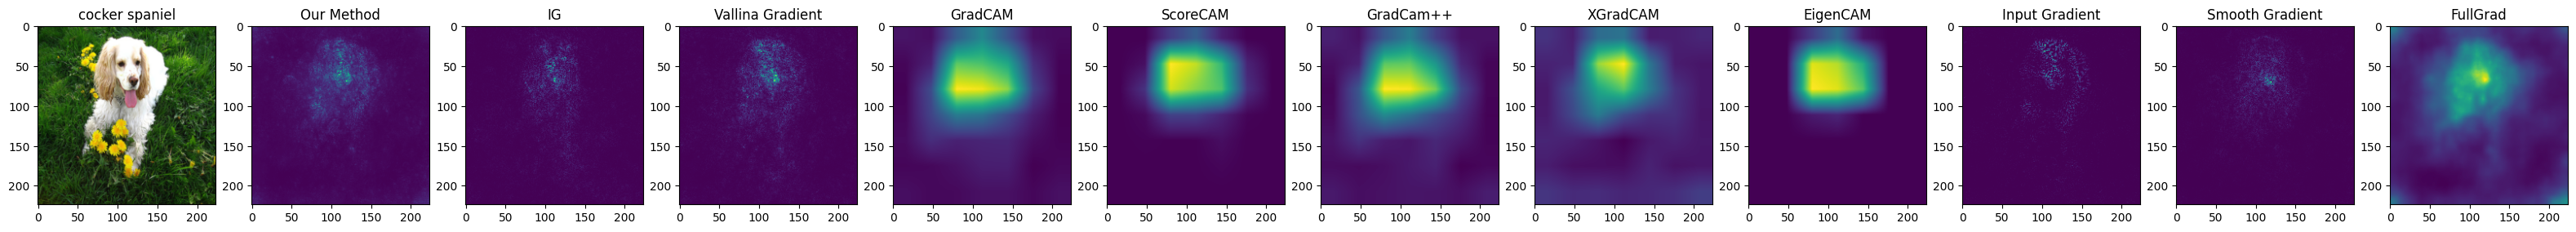

In [36]:
fig,ax = plt.subplots(1,len(methods_name) + 2, figsize=(40, 40))
# for i in range(5):
ax[0].set_title(class_predict[-1])
ax[1].imshow(f_map[-1])
ax[0].imshow(img[-1])
ax[1].set_title("Our Method")
ax[2].imshow(kq[0][-1])
for i in range(2, len(methods_name) + 2):
    if len(kq[i-2][-1].shape) > 2:
        ax[i].imshow(kq[i-2][-1][0])
    else:
        ax[i].imshow(kq[i-2][-1])
    ax[i].set_title(methods_name[i-2])